<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.416949,46.264152,61.935190,0.000150,176.616441,176.616192,0.000249
1,0.0,1.0,23.521121,59.679793,42.230985,-0.000027,135.431871,135.431910,-0.000039
2,0.0,2.0,94.835198,36.045226,31.577519,-0.000637,172.457306,172.457828,-0.000522
3,0.0,3.0,49.872729,87.976734,89.871073,0.000069,237.720604,237.720533,0.000071
4,0.0,4.0,34.735100,23.088393,44.288206,0.000077,112.111776,112.111578,0.000198
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,90.824694,51.292367,41.091921,0.000722,193.209704,193.209010,0.000694
59996,999.0,56.0,79.147237,52.247336,47.583692,0.000400,188.978664,188.978218,0.000446
59997,999.0,57.0,51.381266,20.300969,66.847912,-0.001650,148.528497,148.529581,-0.001085
59998,999.0,58.0,67.987291,89.904660,53.274771,0.000195,221.166917,221.166967,-0.000051


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    58.416949  46.264152  61.935190  0.000150  176.616441   
      1.0    23.521121  59.679793  42.230985 -0.000027  135.431871   
      2.0    94.835198  36.045226  31.577519 -0.000637  172.457306   
      3.0    49.872729  87.976734  89.871073  0.000069  237.720604   
      4.0    34.735100  23.088393  44.288206  0.000077  112.111776   
...                ...        ...        ...       ...         ...   
999.0 55.0   90.824694  51.292367  41.091921  0.000722  193.209704   
      56.0   79.147237  52.247336  47.583692  0.000400  188.978664   
      57.0   51.381266  20.300969  66.847912 -0.001650  148.528497   
      58.0   67.987291  89.904660  53.274771  0.000195  221.166917   
      59.0   56.516586  31.224505  66.594513 -0.002120  164.333484   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    176.616192  0.000249  
      1.0    135.431910 -0.000039  
      2.0    172.457828 -0.000522  
      3.0    237.720533  0.000071  
      4.0    112.111578  0.000198  
...                 ...       ...  
999.0 55.0   193.209010  0.000694  
      56.0   188.978218  0.000446  
      57.0   148.529581 -0.001085  
      58.0   221.166967 -0.000051  
      59.0   164.335181 -0.001697  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    58.416949  46.264152  61.935190  0.000150  176.616441   
      1.0    23.521121  59.679793  42.230985 -0.000027  135.431871   
      2.0    94.835198  36.045226  31.577519 -0.000637  172.457306   
      3.0    49.872729  87.976734  89.871073  0.000069  237.720604   
      4.0    34.735100  23.088393  44.288206  0.000077  112.111776   
...                ...        ...        ...       ...         ...   
999.0 55.0   90.824694  51.292367  41.091921  0.000722  193.209704   
      56.0   79.147237  52.247336  47.583692  0.000400  188.978664   
      57.0   51.381266  20.300969  66.847912 -0.001650  148.528497   
      58.0   67.987291  89.904660  53.274771  0.000195  221.166917   
      59.0   56.516586  31.224505  66.594513 -0.002120  164.333484   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    176.616192  0.000249  
      1.0    135.431910 -0.000039  
      2.0    172.457828 -0.000522  
      3.0    237.720533  0.000071  
      4.0    112.111578  0.000198  
...                 ...       ...  
999.0 55.0   193.209010  0.000694  
      56.0   188.978218  0.000446  
      57.0   148.529581 -0.001085  
      58.0   221.166967 -0.000051  
      59.0   164.335181 -0.001697  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.416949,46.264152,61.935190,0.000150,176.616441,176.616192,0.000249
1,0.0,1.0,23.521121,59.679793,42.230985,-0.000027,135.431871,135.431910,-0.000039
2,0.0,2.0,94.835198,36.045226,31.577519,-0.000637,172.457306,172.457828,-0.000522
3,0.0,3.0,49.872729,87.976734,89.871073,0.000069,237.720604,237.720533,0.000071
4,0.0,4.0,34.735100,23.088393,44.288206,0.000077,112.111776,112.111578,0.000198
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,90.824694,51.292367,41.091921,0.000722,193.209704,193.209010,0.000694
59996,999.0,56.0,79.147237,52.247336,47.583692,0.000400,188.978664,188.978218,0.000446
59997,999.0,57.0,51.381266,20.300969,66.847912,-0.001650,148.528497,148.529581,-0.001085
59998,999.0,58.0,67.987291,89.904660,53.274771,0.000195,221.166917,221.166967,-0.000051


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    58.416949  46.264152  61.935190  0.000150  176.616441   
      1.0    23.521121  59.679793  42.230985 -0.000027  135.431871   
      2.0    94.835198  36.045226  31.577519 -0.000637  172.457306   
      3.0    49.872729  87.976734  89.871073  0.000069  237.720604   
      4.0    34.735100  23.088393  44.288206  0.000077  112.111776   
...                ...        ...        ...       ...         ...   
999.0 55.0   90.824694  51.292367  41.091921  0.000722  193.209704   
      56.0   79.147237  52.247336  47.583692  0.000400  188.978664   
      57.0   51.381266  20.300969  66.847912 -0.001650  148.528497   
      58.0   67.987291  89.904660  53.274771  0.000195  221.166917   
      59.0   56.516586  31.224505  66.594513 -0.002120  164.333484   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    176.616192  0.000249  
      1.0    135.431910 -0.000039  
      2.0    172.457828 -0.000522  
      3.0    237.720533  0.000071  
      4.0    112.111578  0.000198  
...                 ...       ...  
999.0 55.0   193.209010  0.000694  
      56.0   188.978218  0.000446  
      57.0   148.529581 -0.001085  
      58.0   221.166967 -0.000051  
      59.0   164.335181 -0.001697  

[60000 rows x 7 columns]

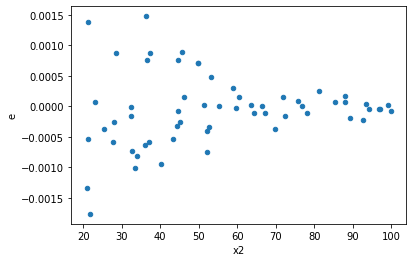

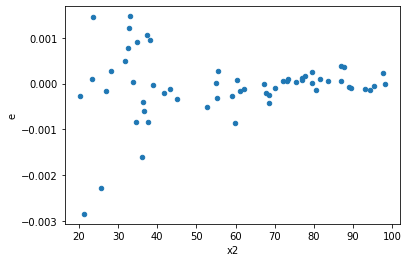

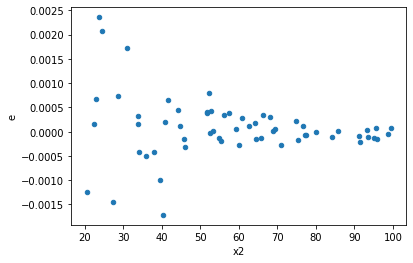

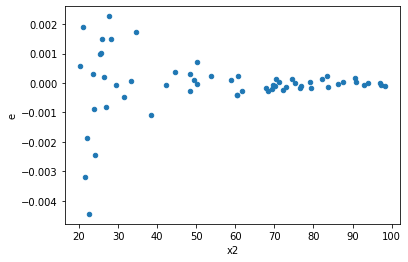

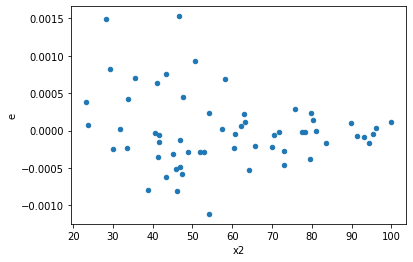

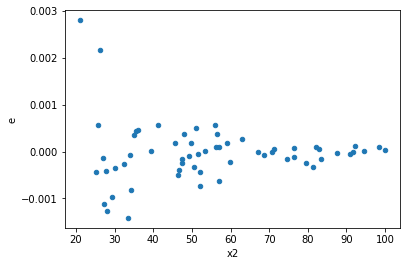

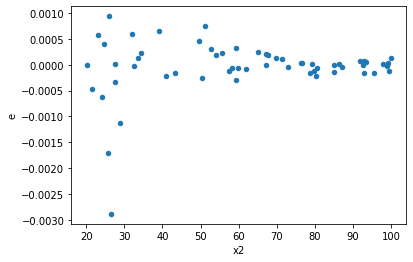

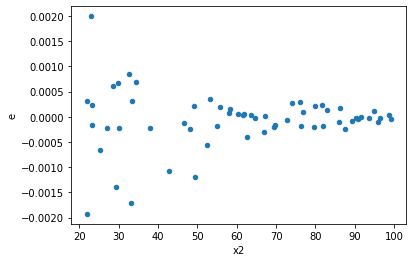

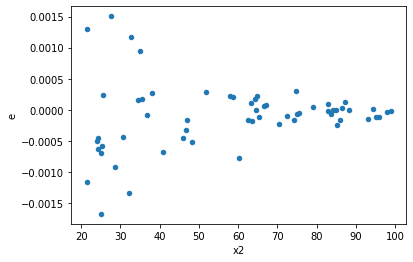

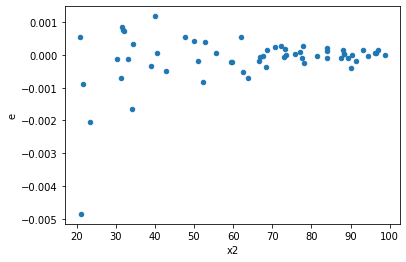

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,28.0,26.0,7.3250682827568285e-06,9.872831438995541e-06,2.616095815270296e-07,3.797242861152131e-07,1.4514922729463555,0.34273680061923106,0.8286315996903845,0.17136840030961553,Reject001=1 : Homoscedasticity
3.0,28.0,26.0,4.58692220156872e-06,5.2831563103361014e-05,1.6381865005602572e-07,2.031983196283116e-06,12.4038575314116,7.929553014207613e-09,0.9999999960352235,3.9647765071038066e-09,Reject001=0 : Heteroscedasticity
5.0,25.0,29.0,3.6902147356159183e-06,1.856996011094346e-05,1.4760858942463673e-07,6.403434521014987e-07,4.338117819548932,0.00022711892675619794,0.9998864405366219,0.00011355946337809897,Reject001=0 : Heteroscedasticity
9.0,22.0,32.0,3.091359837151324e-06,3.1540911948206464e-05,1.405163562341511e-07,9.85653498381452e-07,7.014510800002504,1.0506880416816244e-06,0.9999994746559792,5.253440208408122e-07,Reject001=0 : Heteroscedasticity
11.0,28.0,26.0,5.554245258709132e-07,3.261345605359289e-05,1.983659020967547e-08,1.2543636943689572e-06,63.2348443512802,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
15.0,27.0,27.0,7.6102832294504825e-06,2.185008101060276e-05,2.8186234183149935e-07,8.092622596519541e-07,2.8711258637584893,0.007901600458037894,0.996049199770981,0.003950800229018947,Reject001=0 : Heteroscedasticity
16.0,30.0,24.0,4.582608854418669e-06,1.659228604141814e-05,1.527536284806223e-07,6.913452517257559e-07,4.525884318443258,0.00032015221156322937,0.9998399238942184,0.00016007610578161469,Reject001=0 : Heteroscedasticity
18.0,23.0,31.0,7.150570711906579e-06,3.0127842277627457e-05,3.1089437877854694e-07,9.718658799234664e-07,3.1260323320793644,0.003439637801418982,0.9982801810992905,0.001719818900709491,Reject001=0 : Heteroscedasticity
19.0,27.0,27.0,1.4225015075499302e-06,9.095998118292654e-06,5.2685241020367786e-08,3.3688881919602423e-07,6.394367998919946,7.122013402804939e-06,0.9999964389932986,3.5610067014024693e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,26.0,7.3250682827568285e-06,9.872831438995541e-06,2.616095815270296e-07,3.797242861152131e-07,1.4514922729463555,0.34273680061923106,Reject001=1 : Homoscedasticity
1.0,28.0,26.0,1.566424141135815e-05,1.1724594366988932e-05,5.59437193262791e-07,4.50945937191882e-07,0.8060707128924369,0.575791725076844,Reject001=1 : Homoscedasticity
2.0,23.0,31.0,1.3057842055190436e-05,9.521258059551068e-06,5.677322632691494e-07,3.0713735675971187e-07,0.5409897880228532,0.13098728600199075,Reject001=1 : Homoscedasticity
3.0,28.0,26.0,4.58692220156872e-06,5.2831563103361014e-05,1.6381865005602572e-07,2.031983196283116e-06,12.4038575314116,7.929553014207613e-09,Reject001=0 : Heteroscedasticity
4.0,25.0,29.0,7.189854898669298e-06,4.6464333957614235e-06,2.8759419594677194e-07,1.6022184123315254e-07,0.5571108300906269,0.141210243730514,Reject001=1 : Homoscedasticity
5.0,25.0,29.0,3.6902147356159183e-06,1.856996011094346e-05,1.4760858942463673e-07,6.403434521014987e-07,4.338117819548932,0.00022711892675619794,Reject001=0 : Heteroscedasticity
6.0,26.0,28.0,1.34320368224543e-05,3.104737985863736e-07,5.16616800863627e-07,1.1088349949513343e-08,0.021463394010758027,9.931739914634953e-16,Reject001=0 : Heteroscedasticity
7.0,27.0,27.0,1.017116470188792e-05,6.865906833451948e-06,3.767098037736267e-07,2.542928456834055e-07,0.6750364422058305,0.31325777536968963,Reject001=1 : Homoscedasticity
8.0,18.0,36.0,1.3878239495497178e-05,1.6575242235038538e-06,7.710133053053988e-07,4.6042339541773716e-08,0.059716660172986664,5.776182439238039e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    619
Reject001=1 : Homoscedasticity      381
Name: Result_test, dtype: int64